# HM1: Logistic Regression.

### Name: Dhanesh Akolu


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also, you should plot their objective values versus epochs and compare their training and testing accuracy. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [217]:
# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [218]:
df = pd.read_csv("data.csv")

## 1.2 Examine and clean data

In [219]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.
df = df.drop(['id'],axis=1)
df['diagnosis']= df['diagnosis'].map({'M':-1,'B':1})
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 1.3. Partition to training and testing sets

In [220]:
X = df.drop(['diagnosis','Unnamed: 32'],axis=1)
y = df['diagnosis']
X.shape,y.shape
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machine learning.
x_train, x_test, y_train, y_test = train_test_split( X, y, train_size=0.8, shuffle=True )



In [221]:
train, d = x_train.shape
train_one = np.ones((train, 1))
x_train = np.concatenate((x_train, train_one), axis=1)

test, d = x_test.shape
test_one = np.ones((test, 1))
x_test = np.concatenate((x_test, test_one), axis=1)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)


Shape of x_train:  (455, 31)
Shape of x_test:  (114, 31)


## 1.4. Feature scaling

Use the standardization to transform both training and test features

In [222]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = np.mean(x_train, axis=0).reshape(1, d)
sig = np.std(x_train, axis=0).reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(np.mean(x_test, axis=0))

print('test std = ')
print(np.std(x_test, axis=0))

test mean = 
[ 0.07371661  0.05837218  0.07250118  0.05696173  0.00570117  0.02230675
  0.01068036  0.08344981 -0.02181132 -0.0777096   0.08851276  0.06654856
  0.07234044  0.05349989  0.04935682 -0.06713212 -0.1090219  -0.08537034
 -0.06589574 -0.14215149  0.07672544  0.08604267  0.08357067  0.05251641
  0.04832341  0.02169167  0.01287541  0.04748462 -0.00756765 -0.03912715
  0.        ]
test std = 
[0.96698551 0.98911075 0.97740799 0.92473783 1.26004521 1.13005327
 1.08334898 1.06834036 1.06408193 0.94492177 1.04708168 1.17708098
 1.0390873  0.83417464 1.02506371 1.15672339 0.76433173 0.97557407
 1.01809518 0.71426433 0.94794281 1.03009332 0.97493578 0.87666305
 1.09268336 1.08304818 1.02046985 1.04731326 0.97978345 1.0420604
 0.        ]


In [223]:
import numpy as np
y_train = np.array(y_train).reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_train.shape,type(y_train)

((455, 1), numpy.ndarray)

# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistic regression and when $\lambda > 0$, it essentially becomes a regularized logistic regression.

In [257]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)
def objective(w, x, y, lam):
    n = len(y)
    log_loss = np.sum(np.log(1 + np.exp(-y * x.dot(w))))
    reg_term = 0.5 * lam * np.sum(w ** 2)
    return log_loss / n + reg_term

# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [258]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):
    y = y.reshape((-1, 1))  # reshape y to (n_samples, 1)
    yxw = y * np.dot(x, w)
    grad_loss = -y * x / (1 + np.exp(yxw))
    grad_reg = lam * w
    g = np.mean(grad_loss, axis=0, keepdims=True).T + grad_reg
    return g



In [259]:
# Gradient descent for solving logistic regression
# You will need to do iterative processes (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w, max_epoch=100):
    n,d = x.shape
    objvals = np.zeros(max_epoch) 
    w = np.zeros((d,1))
    for t in range(max_epoch):
        objval = objective(w,x,y,lam)
        objvals[t] = objval
        g = gradient(w,x,y,lam)
        w -= learning_rate * g
    return w, objvals

Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [260]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
# Initialize hyperparameters
# lam = 0
# learning_rate = 0.5   
# max_epoch = 100

# Initialize weight vector
# d = x_train.shape[1]
# w = np.zeros((d, 1))
#y_train = y_train.values

# Train logistic regression using gradient descent
w_logreg, obj_logreg = gradient_descent(x_train, y_train, 0, 0.5,1000)
w_logreg, obj_logreg

(array([[-0.50385746],
        [-0.46712005],
        [-0.49997098],
        [-0.59608246],
        [-0.19307379],
        [ 0.01689815],
        [-0.59016378],
        [-0.70800618],
        [-0.12762071],
        [ 0.23612033],
        [-0.6888763 ],
        [-0.03918332],
        [-0.56306489],
        [-0.65421587],
        [-0.16935984],
        [ 0.41137828],
        [ 0.14933449],
        [ 0.05238881],
        [ 0.05859953],
        [ 0.35948801],
        [-0.7492409 ],
        [-0.73389058],
        [-0.71101035],
        [-0.79914934],
        [-0.6542813 ],
        [-0.14995207],
        [-0.47328538],
        [-0.68413235],
        [-0.49730361],
        [-0.15440935],
        [ 0.        ]]),
 array([0.69314718, 0.24920774, 0.21386995, 0.19163592, 0.17618612,
        0.16471798, 0.15578207, 0.14856506, 0.14257737, 0.13750535,
        0.13313745, 0.12932496, 0.12595982, 0.1229613 , 0.12026771,
        0.11783094, 0.11561287, 0.11358285, 0.1117159 , 0.10999142,
        0.108

In [228]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
# lam = 1E-10
# learning_rate = 0.01
# max_epoch = 100

w_reglog, obj_reglog = gradient_descent(x_train, y_train, 1E-10, 0.5, w)
w_reglog, obj_reglog

(array([[-0.50385746],
        [-0.46712005],
        [-0.49997098],
        [-0.59608246],
        [-0.19307379],
        [ 0.01689815],
        [-0.59016378],
        [-0.70800617],
        [-0.12762071],
        [ 0.23612033],
        [-0.6888763 ],
        [-0.03918332],
        [-0.56306488],
        [-0.65421587],
        [-0.16935984],
        [ 0.41137828],
        [ 0.14933449],
        [ 0.05238881],
        [ 0.05859953],
        [ 0.35948801],
        [-0.7492409 ],
        [-0.73389058],
        [-0.71101035],
        [-0.79914934],
        [-0.6542813 ],
        [-0.14995207],
        [-0.47328538],
        [-0.68413234],
        [-0.49730361],
        [-0.15440935],
        [ 0.        ]]),
 array([0.69314718, 0.24920774, 0.21386995, 0.19163592, 0.17618612,
        0.16471798, 0.15578207, 0.14856506, 0.14257737, 0.13750535,
        0.13313745, 0.12932496, 0.12595982, 0.1229613 , 0.12026771,
        0.11783094, 0.11561287, 0.11358285, 0.1117159 , 0.10999142,
        0.108

In [229]:
# accuracy of Train set for logistic regression
def predict(x, w):
    y_pred = np.dot(x, w)
    y_pred[y_pred > 0] = 1
    y_pred[y_pred <= 0] = -1
    return y_pred
# def predict1(w, x):
#     xw = x.dot(w)
#     f = np.where(xw > 0,1,-1)
#     return np.array(f)
y_train_pred = predict1(w_logreg,x_train)
train_acc_logreg = np.mean(y_train_pred == y_train)
print("Train accuracy of logistic regression: {:.2f}".format(train_acc_logreg))


Train accuracy of logistic regression: 0.98


In [230]:
from sklearn.metrics import accuracy_score

# Calculate accuracy of logistic regression on test set
y_pred_test_logreg = predict1(w_logreg,x_test)
accuracy_logreg_test = accuracy_score(y_test, y_pred_test_logreg)

print("Accuracy of logistic regression on test set: {:.2f}".format(accuracy_logreg_test))


Accuracy of logistic regression on test set: 0.99


In [231]:
# Predict labels for training set using logistic regression
y_pred_train_logreg = predict1(w_logreg,x_train)

# Calculate accuracy of logistic regression on training set
accuracy_logreg_train = accuracy_score(y_train, y_pred_train_logreg)

print("Accuracy of logistic regression on training set: {:.2f}".format(accuracy_logreg_train))


Accuracy of logistic regression on training set: 0.98


In [232]:
# Predict the labels of the train set using the trained weights
y_pred_train_reglog = predict1(w_reglog,x_train)

# Calculate the accuracy of the regularized logistic regression on the train set
accuracy_train_reglog = accuracy_score(y_train, y_pred_train_reglog)

print("Accuracy of regularized logistic regression on train set: {:.2f}".format(accuracy_train_reglog))


Accuracy of regularized logistic regression on train set: 0.98


In [233]:
# Predict using regularized logistic regression
y_pred_test_reglog = predict1(w_reglog,x_test)

# Calculate accuracy of regularized logistic regression on test set
accuracy_reglog_test = accuracy_score(y_test, y_pred_test_reglog)

print("Accuracy of regularized logistic regression on test set: {:.2f}".format(accuracy_reglog_test))


Accuracy of regularized logistic regression on test set: 0.99


In [234]:
# def predict(w, x):
#     #xw = (np.dot(x,w))
#     #f = [1 if i >0 else -1 for i in xw]
#     xw = x.dot(w)
#     f = np.where(xw > 0,1,-1)
#     return np.array(f)

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [235]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    m = np.multiply(yi,xi)
    d = np.dot(m, w)
    expo = np.exp(d)
    sum = np.sum(np.square(w))
    loss = np.log(1 + np.exp(-d)) + (lam/2) * sum
    gradient = -m / (1 + expo) + (lam * w).reshape(xi.shape[0])
    return loss, gradient


Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [236]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)



def sgd(x, y, lam, learning_rate, max_epoch):
    n, d = x.shape
    objvals = np.zeros(max_epoch)
    w = np.zeros((d, 1))
    for t in range(max_epoch):
        RandomIndices = np.random.permutation(n)
        x_rand = x[RandomIndices, :]
        y_rand = y[RandomIndices, :]
        objval = 0
        for xi, yi in zip(x_rand, y_rand):
            obj, g = stochastic_objective_gradient(w, xi, float(yi), lam)
            objval += obj
            w -= learning_rate * g.reshape((d, 1))
        objval /= n
        objvals[t] = objval
    return w, objvals





Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [237]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w_sgd, loss_sgd = sgd(x_train, y_train, 0, 0.01, 100)
w_sgd,loss_sgd


(array([[-0.17359188],
        [-0.53071396],
        [-0.19545065],
        [-0.55293453],
        [-0.16246704],
        [ 0.8686617 ],
        [-1.29500437],
        [-1.41258274],
        [ 0.11940482],
        [ 0.07997328],
        [-1.60364905],
        [ 0.25926691],
        [-1.09144484],
        [-1.47140169],
        [-0.4032172 ],
        [ 1.40743098],
        [ 0.08356714],
        [-0.23945736],
        [ 0.41272855],
        [ 0.68621275],
        [-1.13639198],
        [-1.41290661],
        [-1.02527577],
        [-1.40898485],
        [-0.79131537],
        [ 0.29319432],
        [-0.88215594],
        [-1.43459133],
        [-0.97388795],
        [-0.60702403],
        [ 0.        ]]),
 array([0.23408323, 0.12882286, 0.10840381, 0.09814171, 0.09177596,
        0.08719871, 0.08372487, 0.08104043, 0.078733  , 0.0768011 ,
        0.07512988, 0.07376295, 0.07245644, 0.07137668, 0.07033458,
        0.06941655, 0.0685763 , 0.06779863, 0.06707951, 0.06640263,
        0.065

In [238]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w_sgd_reg , loss_sgd_reg = sgd(x_train, y_train, 1E-10, 0.01, 100)
print(w_sgd_reg,loss_sgd_reg)

[[-0.17141269]
 [-0.53403432]
 [-0.19337859]
 [-0.55092482]
 [-0.15232592]
 [ 0.86991189]
 [-1.29865144]
 [-1.41617215]
 [ 0.12243866]
 [ 0.0828441 ]
 [-1.60428068]
 [ 0.25343407]
 [-1.08969406]
 [-1.47129613]
 [-0.40320999]
 [ 1.41057797]
 [ 0.08224681]
 [-0.23636029]
 [ 0.41685136]
 [ 0.68988995]
 [-1.13486853]
 [-1.4138404 ]
 [-1.023477  ]
 [-1.40653487]
 [-0.7843621 ]
 [ 0.30440904]
 [-0.87696611]
 [-1.43201861]
 [-0.97349386]
 [-0.59856378]
 [ 0.        ]] [0.22830849 0.12778773 0.1081743  0.09818101 0.0918867  0.08729761
 0.08372536 0.08096409 0.0787235  0.07682507 0.07514483 0.07377072
 0.07248046 0.07134668 0.07029862 0.0693341  0.06858626 0.06771405
 0.06702286 0.06631757 0.06569951 0.06521682 0.06462302 0.06413367
 0.06363594 0.06317169 0.06273993 0.06232472 0.06181858 0.06154019
 0.06117923 0.06084164 0.06049162 0.06020703 0.0598974  0.05959459
 0.05933824 0.05903441 0.05877142 0.05853213 0.05827297 0.05804449
 0.05782872 0.05760886 0.05737629 0.05717696 0.05697657 0.0567455

In [239]:
# Accuracy for train set logistic regression stochastic gradient descent
y_pred_2 = predict1(w_sgd,x_train)
accuracy_score(y_train,y_pred_2)

0.9912087912087912

In [240]:
# Accuracy for test set regularised logistic regression stochastic gradient descent
y_pred_reg_2 = predict1(w_sgd_reg, x_test)
accuracy_score(y_test,y_pred_reg_2)

0.9824561403508771

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [241]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-b matrix
#     xi: data: b-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i
def mb_objective_gradient(w, xi, yi, lam):
    n , d = xi.shape
    loss = np.mean(np.log(1+ np.exp(-(np.dot(np.multiply(yi, xi),w))))) + (lam/2)* np.sum(np.square(w))
    gradient = np.mean(np.divide(-(np.multiply(yi, xi)),(1+ np.exp(np.dot(np.multiply(yi, xi),w)))), axis=0).reshape(d,1) + (lam * w)
    return loss, gradient


Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [242]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)


def mbgd(x, y, lam, learning_rate, b_size, max_epoch=100):
    n, d = x.shape
    objvals = np.zeros(max_epoch)
    w = np.zeros((d, 1))
    y = y.values.reshape((n, 1)) if isinstance(y, pd.Series) else y.reshape((n, 1))
    
    for k in range(max_epoch):
        rand_indices = np.random.permutation(n)
        x_random = x[rand_indices]
        y_random = y[rand_indices]

        objval = 0
        for i in range(0, n, b_size):
            x_batch = x_random[i:i + b_size]
            y_batch = y_random[i:i + b_size]

            obj, g = mb_objective_gradient(w, x_batch, y_batch, lam)
            objval += obj
            w -= learning_rate * g

        objval /= b_size
        objvals[k] = objval

    return w, objvals



Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [243]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.

w_mbgd, objvals_mbsgd = mbgd(x_train, y_train, 0, 0.01,32)
w_mbgd, objvals_mbsgd

(array([[-0.42875405],
        [-0.35218502],
        [-0.4265856 ],
        [-0.44933452],
        [-0.17196465],
        [-0.13063791],
        [-0.37473021],
        [-0.490778  ],
        [-0.13360278],
        [ 0.17658065],
        [-0.40781701],
        [-0.0268915 ],
        [-0.35232762],
        [-0.38897166],
        [-0.05693937],
        [ 0.16352534],
        [ 0.12402974],
        [-0.00884226],
        [ 0.03880725],
        [ 0.22629739],
        [-0.52974342],
        [-0.4700734 ],
        [-0.51254306],
        [-0.52451959],
        [-0.40047094],
        [-0.2062197 ],
        [-0.31303558],
        [-0.48126513],
        [-0.32833961],
        [-0.09813619],
        [ 0.        ]]),
 array([0.27453358, 0.21170755, 0.17655811, 0.15627016, 0.14210024,
        0.13180462, 0.12540791, 0.12178279, 0.11347718, 0.10853112,
        0.10284102, 0.09964676, 0.09523075, 0.090439  , 0.08813739,
        0.08945078, 0.08451161, 0.08514145, 0.08151294, 0.0819079 ,
        0.076

In [244]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w_mbgd_reg, objvals_mbsgd_reg = mbgd(x_train, y_train, 0.01, 0.01,32)
w_mbgd_reg, objvals_mbsgd_reg

(array([[-0.40477447],
        [-0.33230728],
        [-0.40247853],
        [-0.4231315 ],
        [-0.15920231],
        [-0.12056402],
        [-0.35122402],
        [-0.45912393],
        [-0.12967308],
        [ 0.16889859],
        [-0.37724044],
        [-0.0208528 ],
        [-0.32664721],
        [-0.36105189],
        [-0.06165025],
        [ 0.15018398],
        [ 0.11505981],
        [-0.01056225],
        [ 0.03522249],
        [ 0.21071507],
        [-0.49798123],
        [-0.44308221],
        [-0.48184042],
        [-0.49211257],
        [-0.37444036],
        [-0.19355077],
        [-0.29631481],
        [-0.45241519],
        [-0.31189337],
        [-0.09201578],
        [ 0.        ]]),
 array([0.27801979, 0.2135117 , 0.18027471, 0.15656985, 0.14553041,
        0.13353418, 0.12439136, 0.12230135, 0.11010207, 0.10690638,
        0.10330795, 0.09852832, 0.09866935, 0.10002392, 0.09083259,
        0.08898501, 0.09192263, 0.0877941 , 0.08775746, 0.08313052,
        0.081

In [245]:
# Accuracy for train set logistic regression stochastic gradient descent
y_pred_2 = predict1(w_mbgd,x_train)
accuracy_score(y_train,y_pred_2)


0.9758241758241758

In [246]:
# Accuracy for train set logistic regression stochastic gradient descent
y_pred_2 = predict1(w_mbgd_reg,x_train)
accuracy_score(y_train,y_pred_2)

0.9758241758241758

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

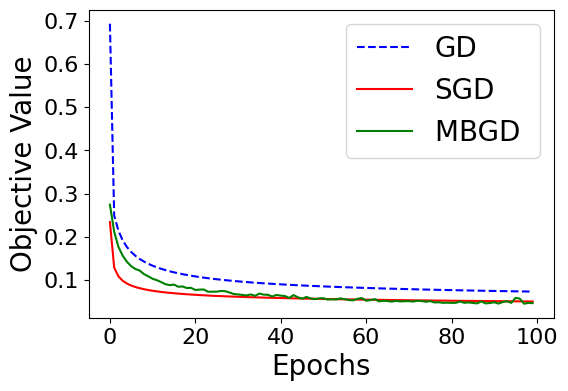

In [247]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(6, 4))

epochs_gd = range(len(obj_logreg))
epochs_sgd = range(len(loss_sgd))
epochs_mbsgd = range(len(objvals_mbsgd))


line0, = plt.plot(epochs_gd, obj_logreg, '--b')
line1, = plt.plot(epochs_sgd, loss_sgd, '-r')
line2, = plt.plot(epochs_mbsgd, objvals_mbsgd,'-g')
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Objective Value', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend([line0, line1, line2], ['GD', 'SGD','MBGD '], fontsize=20)
#plt.tight_layout()
plt.show()

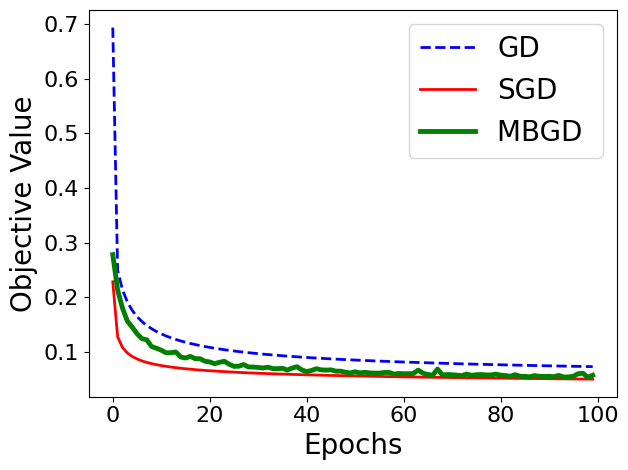

In [248]:
epochs_gd = range(len(obj_reglog))
epochs_sgd = range(len(loss_sgd_reg))
epochs_mbsgd = range(len(objvals_mbsgd_reg))
# epochs_mbsgd64 = range(len(objvals_mbsgd64))

line0, = plt.plot(epochs_gd, obj_reglog, '--b', linewidth=2)
line1, = plt.plot(epochs_sgd, loss_sgd_reg, '-r', linewidth=2)
line2, = plt.plot(epochs_mbsgd, objvals_mbsgd_reg,'-g', linewidth=3.5)
# line3, = plt.plot(epochs_mbsgd64, objvals_mbsgd64, '--y', linewidth=2)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Objective Value', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend([line0, line1, line2], ['GD', 'SGD','MBGD '], fontsize=20)
plt.tight_layout()
plt.show()


# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [249]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict1(w, x):
    xw = x.dot(w)
    f = np.where(xw > 0,1,-1)
    return np.array(f)


In [250]:
# evaluate training error of logistic regression and regularized version
y_train_pred = predict1(w_logreg,x_train)
train_error_logreg = np.mean(y_train_pred != y_train)   
print("Training error of logistic regression:", train_error_logreg)


y_train_pred = predict1(w_reglog,x_train)
train_error_reglog = np.mean(y_train_pred != y_train)   
print("Training error of regularized logistic regression:", train_error_reglog)

#Training error of SGD and Regularized SGD
y_train_pred = predict1(w_sgd,x_train)
train_error_logreg = np.mean(y_train_pred != y_train)   
print("Training error of SGD:", train_error_logreg)


y_train_pred = predict1(w_sgd_reg,x_train)
train_error_reglog = np.mean(y_train_pred != y_train)   
print("Training error of regularized SGD:", train_error_reglog)

#Training error of MBGD and Regularized MBGD
y_train_pred = predict1(w_mbgd,x_train)
train_error_logreg = np.mean(y_train_pred != y_train)   
print("Training error of MBGD:", train_error_logreg)


y_train_pred = predict1(w_mbgd_reg,x_train)
train_error_reglog = np.mean(y_train_pred != y_train)   
print("Training error of regularized MBGD:", train_error_reglog)

Training error of logistic regression: 0.017582417582417582
Training error of regularized logistic regression: 0.017582417582417582
Training error of SGD: 0.008791208791208791
Training error of regularized SGD: 0.008791208791208791
Training error of MBGD: 0.024175824175824177
Training error of regularized MBGD: 0.024175824175824177


In [251]:
# evaluate testing error of logistic regression and regularized version
# Calculate testing error of logistic regression
y_test_pred = predict1(w_logreg,x_test)
test_error_logreg = np.mean(y_test_pred.flatten() != y_test.values.flatten())
print("Testing error of logistic regression:", test_error_logreg)

# Calculate testing error of regularized logistic regression
y_test_pred = predict1(w_reglog,x_test)
test_error_reglog = np.mean(y_test_pred.flatten() != y_test.values.flatten())
print("Testing error of regularized logistic regression:", test_error_reglog)

# #Calculating testing error of SGD
y_test_pred = predict1(w_sgd,x_test)
test_error_logreg = np.mean(y_test_pred.flatten() != y_test.values.flatten())
print("Testing error of SGD logistic regression:", test_error_logreg)

# Calculate testing error of regularized logistic regression
y_test_pred = predict1(w_sgd_reg,x_test)
test_error_reglog = np.mean(y_test_pred.flatten() != y_test.values.flatten())
print("Testing error of regularized SGD logistic regression:", test_error_reglog)

# #Calculating testing error of MBGD
y_test_pred = predict1(w_mbgd,x_test)
test_error_logreg = np.mean(y_test_pred.flatten() != y_test.values.flatten())
print("Testing error of MBGD logistic regression:", test_error_logreg)

# Calculate testing error of regularized logistic regression
y_test_pred = predict(x_test,w_mbgd_reg)
test_error_reglog = np.mean(y_test_pred.flatten() != y_test.values.flatten())
print("Testing error of regularized MBGD logistic regression:", test_error_reglog)



Testing error of logistic regression: 0.008771929824561403
Testing error of regularized logistic regression: 0.008771929824561403
Testing error of SGD logistic regression: 0.017543859649122806
Testing error of regularized SGD logistic regression: 0.017543859649122806
Testing error of MBGD logistic regression: 0.03508771929824561
Testing error of regularized MBGD logistic regression: 0.03508771929824561


In [252]:
# def cross_entropy_loss(y_true, y_pred):
#     loss = -np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
#     return loss

# # Calculate testing error of logistic regression
# y_test_pred = predict(x_test, w_logreg)
# y_test_pred = np.clip(y_test_pred, 1e-15, 1 - 1e-15) # Add small value to ensure not exactly 0 or 1
# test_error_logreg = cross_entropy_loss(np.array(y_test).reshape(-1, 1), y_test_pred.reshape(-1, 1))

# print("Testing error of logistic regression:", test_error_logreg)



# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)

In [253]:
from sklearn.metrics import mean_squared_error

lam_values = [0, 1, 10, 100]
lr_values = [0.001, 0.01, 0.1]
batch_size = 60
max_epochs = 100

for lam in lam_values:
    for lr in lr_values:
        w_mbgd_reg = np.zeros(x_train.shape[1])
        w_mbgd_reg, obj_val_reg = mbgd(x_train, y_train, lam, lr, batch_size, max_epochs)

        f_train = predict1(w_mbgd, x_train)
        f_train_reg = predict1(w_mbgd_reg, x_train)

        error = mean_squared_error(y_train, f_train)
        error_reg = mean_squared_error(y_train, f_train_reg)

        accuracy = accuracy_score(y_train, f_train)
        accuracy_reg = accuracy_score(y_train, f_train_reg)

        print(f"Lambda = {lam}, error: {error}, Accuracy: {accuracy}")
        print(f"Learning rate = {lr}, error_reg: {error_reg}, Accuracy_reg: {accuracy_reg}\n")


Lambda = 0, error: 0.0967032967032967, Accuracy: 0.9758241758241758
Learning rate = 0.001, error_reg: 0.210989010989011, Accuracy_reg: 0.9472527472527472

Lambda = 0, error: 0.0967032967032967, Accuracy: 0.9758241758241758
Learning rate = 0.01, error_reg: 0.11428571428571428, Accuracy_reg: 0.9714285714285714

Lambda = 0, error: 0.0967032967032967, Accuracy: 0.9758241758241758
Learning rate = 0.1, error_reg: 0.06153846153846154, Accuracy_reg: 0.9846153846153847

Lambda = 1, error: 0.0967032967032967, Accuracy: 0.9758241758241758
Learning rate = 0.001, error_reg: 0.210989010989011, Accuracy_reg: 0.9472527472527472

Lambda = 1, error: 0.0967032967032967, Accuracy: 0.9758241758241758
Learning rate = 0.01, error_reg: 0.1934065934065934, Accuracy_reg: 0.9516483516483516

Lambda = 1, error: 0.0967032967032967, Accuracy: 0.9758241758241758
Learning rate = 0.1, error_reg: 0.2021978021978022, Accuracy_reg: 0.9494505494505494

Lambda = 10, error: 0.0967032967032967, Accuracy: 0.9758241758241758
L

C:\Users\Dhanesh Akolu\AppData\Local\Temp\ipykernel_22400\1677422312.py:12: RuntimeWarning: overflow encountered in exp
  loss = np.mean(np.log(1+ np.exp(-(np.dot(np.multiply(yi, xi),w))))) + (lam/2)* np.sum(np.square(w))
C:\Users\Dhanesh Akolu\AppData\Local\Temp\ipykernel_22400\1677422312.py:13: RuntimeWarning: overflow encountered in exp
  gradient = np.mean(np.divide(-(np.multiply(yi, xi)),(1+ np.exp(np.dot(np.multiply(yi, xi),w)))), axis=0).reshape(d,1) + (lam * w)
C:\Users\Dhanesh Akolu\AppData\Local\Temp\ipykernel_22400\1677422312.py:12: RuntimeWarning: overflow encountered in scalar multiply
  loss = np.mean(np.log(1+ np.exp(-(np.dot(np.multiply(yi, xi),w))))) + (lam/2)* np.sum(np.square(w))
C:\Users\Dhanesh Akolu\AppData\Local\Temp\ipykernel_22400\1677422312.py:12: RuntimeWarning: overflow encountered in square
  loss = np.mean(np.log(1+ np.exp(-(np.dot(np.multiply(yi, xi),w))))) + (lam/2)* np.sum(np.square(w))
c:\Users\Dhanesh Akolu\AppData\Local\Programs\Python\Python39\lib\s